<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Классификация звуков</b></h3>

**Автор**: Ермекова Асель


В этом задании вам предстоит решить задачу классификации звуков на основе wav файлов и использовании различных аугментаций данных.

Есть две части этого домашнего задания.

### 1 Часть. Отправить ваши предсказания в Stepik.
Результат вашей лучшей модели будет оцениваться на тестовой выборке по метрике Accuracy. Эта часть оценивается до 5 баллов.

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.70$ --- 4 балла

3) $0.70 > score \geqslant 0.60$ --- 3 балла

4) $0.60 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.25$ --- 1 балл

6) $0.25 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на три части.

1. `train.csv`. На этом наборе данных вам необходимо создать и обучить модель.
2. `valid.csv`. На этом наборе данных вы можете валидировать вашу модель.
3. `test.csv`. Предсказания для этого набора необходимо записать в файл `submission.csv` и сдать в соответствующий шаг на Stepik. Количество попыток ограничено до 100 штук. В конце ноутбука есть пример оформления файла посылки.

### 2 Часть. Сделать полноценный отчет о вашей работе (5 баллов).
Опишите итеративный процесс улучшения метрики:
* как вы обработали данные, какие аугментации добавляли, что сработало, а что нет.
* какие архитектуры модели попробовали и какие результаты получились.

В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается до 5 баллов.

### Peer-review
Вторая часть будет проверяться в формате peer-review, т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.


### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


# **Environmental Sound Classification**

## **Task Overview**

В этом домашнем задании вам предстоит работать с датасетом различных звуков окружающей среды (собака, дождь, плач ребёнка и т. д.).

### **Part 1: Create Dataset**

Первым делом давайте скачаем датасет и прилагающие csv файлы с метками класса.

In [1]:
!gdown 1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO # sound_classification_dataset.zip
!gdown 1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT # train.csv
!gdown 1my0RPDQdTxvCGmnZei06tiXgKko3R4o4 # valid.csv
!gdown 1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks # test.csv

Downloading...
From (original): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO
From (redirected): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO&confirm=t&uuid=3017d608-9f29-4aec-ae09-c7c1e42f19a0
To: /home/max/work_area/DLS_МФТИ/dls-speech-course/HW1/sound_classification_dataset.zip
100%|████████████████████████████████████████| 645M/645M [03:09<00:00, 3.41MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT
To: /home/max/work_area/DLS_МФТИ/dls-speech-course/HW1/train.csv
100%|██████████████████████████████████████| 3.09k/3.09k [00:00<00:00, 16.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1my0RPDQdTxvCGmnZei06tiXgKko3R4o4
To: /home/max/work_area/DLS_МФТИ/dls-speech-course/HW1/valid.csv
100%|██████████████████████████████████████| 1.06k/1.06k [00:00<00:00, 2.54MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks
To: /home/max/work_area/DLS_МФТИ/dls-speech-cour

In [3]:
!unzip sound_classification_dataset.zip

Archive:  sound_classification_dataset.zip
   creating: content/sound_classification_dataset/
  inflating: content/sound_classification_dataset/1-61261-A-44.wav  
  inflating: content/sound_classification_dataset/2-104105-A-19.wav  
  inflating: content/sound_classification_dataset/3-150363-A-38.wav  
  inflating: content/sound_classification_dataset/1-18074-A-6.wav  
  inflating: content/sound_classification_dataset/5-161270-A-33.wav  
  inflating: content/sound_classification_dataset/5-221529-A-39.wav  
  inflating: content/sound_classification_dataset/2-61618-A-46.wav  
  inflating: content/sound_classification_dataset/1-46274-A-18.wav  
  inflating: content/sound_classification_dataset/1-69760-A-16.wav  
  inflating: content/sound_classification_dataset/2-64963-A-15.wav  
  inflating: content/sound_classification_dataset/2-108766-A-9.wav  
  inflating: content/sound_classification_dataset/4-165845-A-45.wav  
  inflating: content/sound_classification_dataset/5-235644-A-30.wav  
  in

In [1]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df['category'] = train_df['category'].astype('category')
train_df['category'].unique()

['dog', 'rain', 'crying_baby', 'clock_tick', 'sneezing']
Categories (5, object): ['clock_tick', 'crying_baby', 'dog', 'rain', 'sneezing']

In [4]:
categories = ['dog', 'rain', 'crying_baby', 'clock_tick', 'sneezing']
mapping = {cat: idx for idx, cat in enumerate(categories)} # map для замены на индексы для обучения

train_df['category'] = train_df['category'].map(mapping)
valid_df['category'] = valid_df['category'].map(mapping)

Для этого задания при создании датасета вам нужно сделать обработку аудио данных следующим образом:
* **Sample rate --> 16000**: ресэмплируйте оригинальный `sample_rate` в `sample_rate = 16000`
* **Stereo --> Mono**: преобразуйте многоканальное аудио в моноканальное
* **Length = X secs:** чтобы суметь создать батч, вам необходимо, чтобы длина всех ваших аудиозаписей была одинаковой, поэтому вам нужно зафиксировать длину всех аудиозаписей, и если аудио меньше заданной длины, то сделайте паддинг, если больше, обрежьте аудио до заданной длины.

* **Audio Augmentation:** используйте разные аугментации. Вы можете воспользоваться библиотеками:
  * [torchaudio.transforms](https://docs.pytorch.org/audio/main/transforms.html)
  * [torch_audiomentations](https://github.com/iver56/torch-audiomentations)

**ВАЖНО**: в этом домашнем задании вам нельзя переводить `wav` в мелспектрограммы.

Внизу для удобства предоставлен псевдокод, который можно заполнить необходимыми функциями, но вы можете видоизменять его как вам будет удобно.

In [5]:
from torch.utils.data import Dataset
import pandas as pd
import os
import torchaudio
import torch
import torchaudio.transforms as T
import torchaudio.functional as F
import torch.nn.functional as nnfunc
import random
from audiomentations import Compose, AddGaussianNoise, PitchShift, Shift



class SimpleAudioDataset(Dataset):
    """A dataset to load, preprocess, and augment audio files."""

    def __init__(self, dataset, do_augmentation=False, do_energy=False):
        self.dataset = dataset
        self.do_augmentation = do_augmentation
        self.do_energy = do_energy

    def __len__(self):
        return self.dataset.shape[0]

    def __getitem__(self, index):
        # 1. Get the file path and label
        item = self.dataset.iloc[index]
        audio_file_path = item['filename']
        label = torch.tensor(item['category'])

        # 2. LOAD: Load the raw audio 
        signal, sample_rate = torchaudio.load(f'content/sound_classification_dataset/{audio_file_path}')


        # 3. PREPROCESS: Apply the preprocessing steps
        signal = self._resample(signal, sample_rate) # Resample to the sample rate 16000
        signal = self._stereo_to_mono(signal) # Converts (channels, samples) -> (samples,)
        signal = self._cut_or_pad(signal) # State fixed length
        if self.do_energy:
            signal = self._energy(signal)

        # 4. AUGMENT: Apply augmentations only if training
        if self.do_augmentation:
            signal = self._augmentation(signal)

        # 5. RETURN: We now have a clean, standardized waveform and its label
        return signal, label

    # --- The Core Preprocessing Functions ---
    def _resample(self, signal, original_sr):
        resampler = T.Resample(orig_freq=original_sr, new_freq=16000)
        signal = resampler(signal)
        return signal

    def _stereo_to_mono(self, signal):
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal

    def _cut_or_pad(self, signal):
        target_length = 16000 * 5
        current_length = signal.shape[1]
        
        if current_length > target_length:
            signal = signal[..., :target_length]
        
        elif current_length < target_length:
            pad_amount = target_length - current_length
            signal = nnfunc.pad(signal, (0, pad_amount))
        return signal

    def _augmentation(self, signal):
        augment_raw_audio = Compose(
            [
                AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.015, p=1),
                PitchShift(min_semitones=-8, max_semitones=8, p=1),
                Shift(min_shift=-0.2, max_shift=0.2, p=1.0)
            ]
        )
        signal = augment_raw_audio(samples=signal, sample_rate=16000)
        return signal
    
    def _energy(self, signal):
        signal = signal ** 2
        window_size_ms = 50 
        window_size_samples = int(16000 * window_size_ms / 1000)
        signal = np.convolve(signal.squeeze(0).numpy(), np.ones(window_size_samples), mode='same')
        signal = torch.tensor(signal, dtype=torch.float32).unsqueeze(0)
        return signal

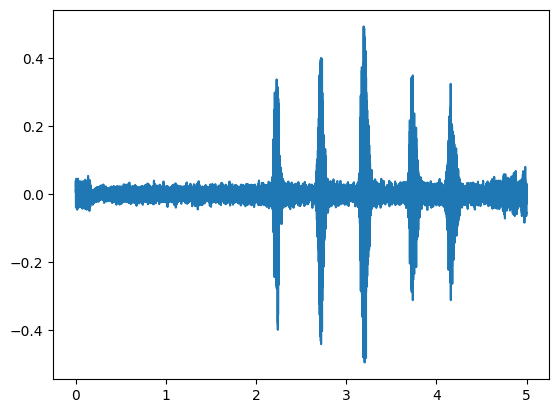

In [6]:
train_dataset = SimpleAudioDataset(train_df, do_augmentation=True, do_energy=False)
valid_dataset = SimpleAudioDataset(valid_df)

times = np.linspace(0., 5.0, 16000 * 5)
signal, label = train_dataset[16]
plt.plot(times, signal.squeeze(0))
plt.show()

### **Part 2: Building a Model that Learns from Waveforms**

В этом разделе вам нужно написать архитектуру по вашему выбору, которая будет решать задачу классификации на 5 классов.

In [7]:
import torch.nn as nn

class SoundClassificatonModel(nn.Module):
    """A simple model that processes raw waveforms."""

    def __init__(self, input_size=16000, num_classes=5):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=9, padding=4)
        self.bn1 = nn.BatchNorm1d(16)
        self.pool = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=9, padding=4)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc1 = nn.Linear(32 * input_size // 16, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(nnfunc.relu(self.bn1(self.conv1(x))))
        x = self.pool(nnfunc.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = nnfunc.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### **Part 3: Training and Evaluation**

В этом разделе вам нужно написать код тренировки и запустить саму тренировку и вывести лучшие значения метрики качества на train и valid данных. Для вашего удобства написана функция отображения значений лоссов и метрики accuracy.

In [8]:
def plot_metrics(train_losses, train_accuracies, test_losses, test_accuracies):
    """
    Plot training and validation metrics
    """
    epochs = range(1, len(train_losses) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
    ax1.plot(epochs, test_losses, 'r-', label='Valid Loss', linewidth=2)
    ax1.set_title('Training and Test Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(epochs, train_accuracies, 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs, test_accuracies, 'r-', label='Valid Accuracy', linewidth=2)
    ax2.set_title('Training and Valid Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


Correct: 34/40


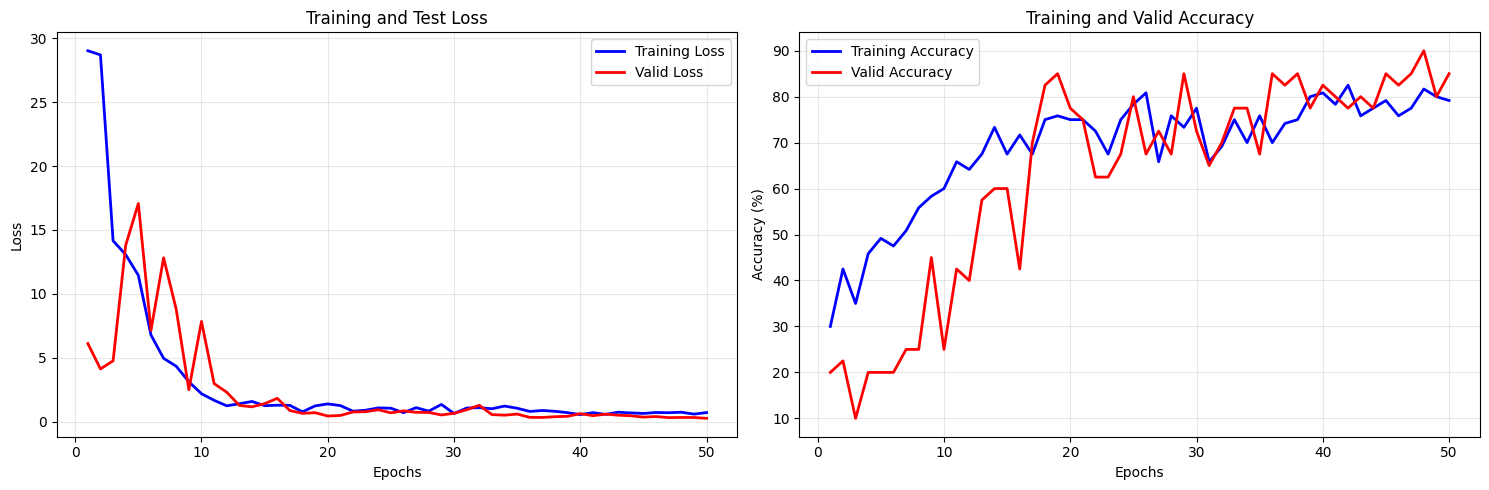

In [9]:
from torch.utils.data import DataLoader
from IPython.display import clear_output


# Initialize datasets & dataloaders
train_data = SimpleAudioDataset(train_df, do_augmentation=True, do_energy=False) 
valid_data = SimpleAudioDataset(valid_df, do_augmentation=True, do_energy=False) 

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)

# Model, Loss, Optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SoundClassificatonModel(input_size=16000 * 5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []
best_model = None
best_loss = float('inf')
best_train_accuracy = 0.0
best_valid_accuracy = 0.0


n_epochs = 50
for epoch in range(n_epochs):

    # Train
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    for signals, labels in train_loader:
        signals, labels = signals.to(device), labels.to(device)
        predictions = model(signals)
        loss = criterion(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        # calculate accyracy
        _, predicted_classes = torch.max(predictions.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted_classes == labels).sum().item()

    # Evaluation
    model.eval()
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    with torch.no_grad():
        for signals, labels in valid_loader:
            signals, labels = signals.to(device), labels.to(device)
            predictions = model(signals)
            loss = criterion(predictions, labels)
            val_loss += loss.item()

            _, predicted_classes = torch.max(predictions.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted_classes == labels).sum().item()

    # Calculate average test loss and accuracy for this epoch
    epoch_train_loss = train_loss / len(train_loader)
    epoch_train_acc = 100 * train_correct / train_total

    epoch_valid_loss = val_loss / len(valid_loader)
    epoch_valid_acc = 100 * val_correct / val_total

    print(f'Correct: {val_correct}/{val_total}')

    if val_loss < best_loss:
        best_loss = val_loss
        best_model = model
        best_train_accuracy = epoch_train_acc
        best_valid_accuracy = epoch_valid_acc

    # Store metrics
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    valid_losses.append(epoch_valid_loss)
    valid_accuracies.append(epoch_valid_acc)

    plot_metrics(train_losses, train_accuracies, valid_losses, valid_accuracies)
    clear_output(wait=True)

In [10]:
best_model.eval()
val_loss = 0.0
val_total = 0
val_correct = 0
with torch.no_grad():
    for signals, labels in valid_loader:
        signals, labels = signals.to(device), labels.to(device)
        predictions = best_model(signals)
        loss = criterion(predictions, labels)
        val_loss += loss.item()

        _, predicted_classes = torch.max(predictions.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted_classes == labels).sum().item()

# Calculate average test loss and accuracy for this epoch
epoch_train_loss = train_loss / len(train_loader)
epoch_train_acc = 100 * train_correct / train_total

epoch_valid_loss = val_loss / len(valid_loader)
epoch_valid_acc = 100 * val_correct / val_total

print(f'Correct: {val_correct}/{val_total}')

Correct: 34/40


In [11]:
print("Train Accuracy = ", best_train_accuracy)
print("Valid Accuracy = ", best_valid_accuracy)

Train Accuracy =  79.16666666666667
Valid Accuracy =  85.0


### **Part 4. Test Demo for ESC-50**

Для вашего удобства предоставляется код для тестирования модели и отрисовки формы сигналов, прогноза и топ-5 наиболее вероятных классов.

Using device: cpu
ESC-50 Audio Classification Demo!


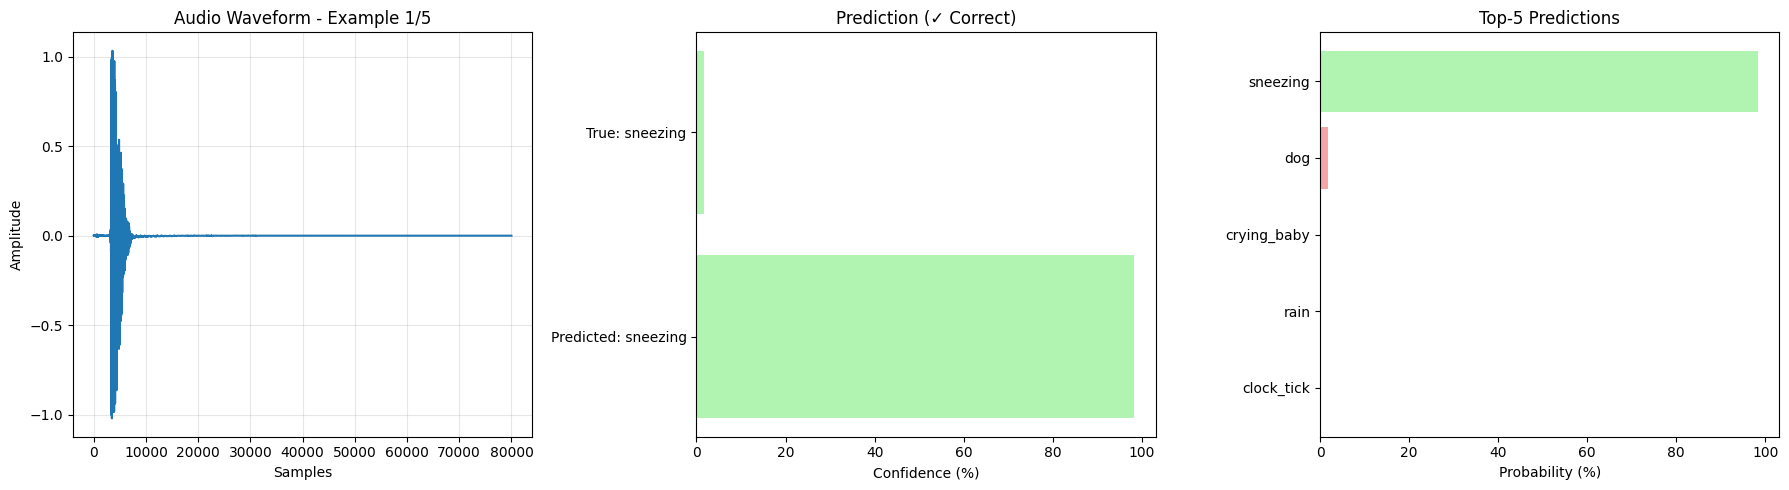

Playing: sneezing


Prediction: sneezing (98.26%)
True label: sneezing
Correct: True


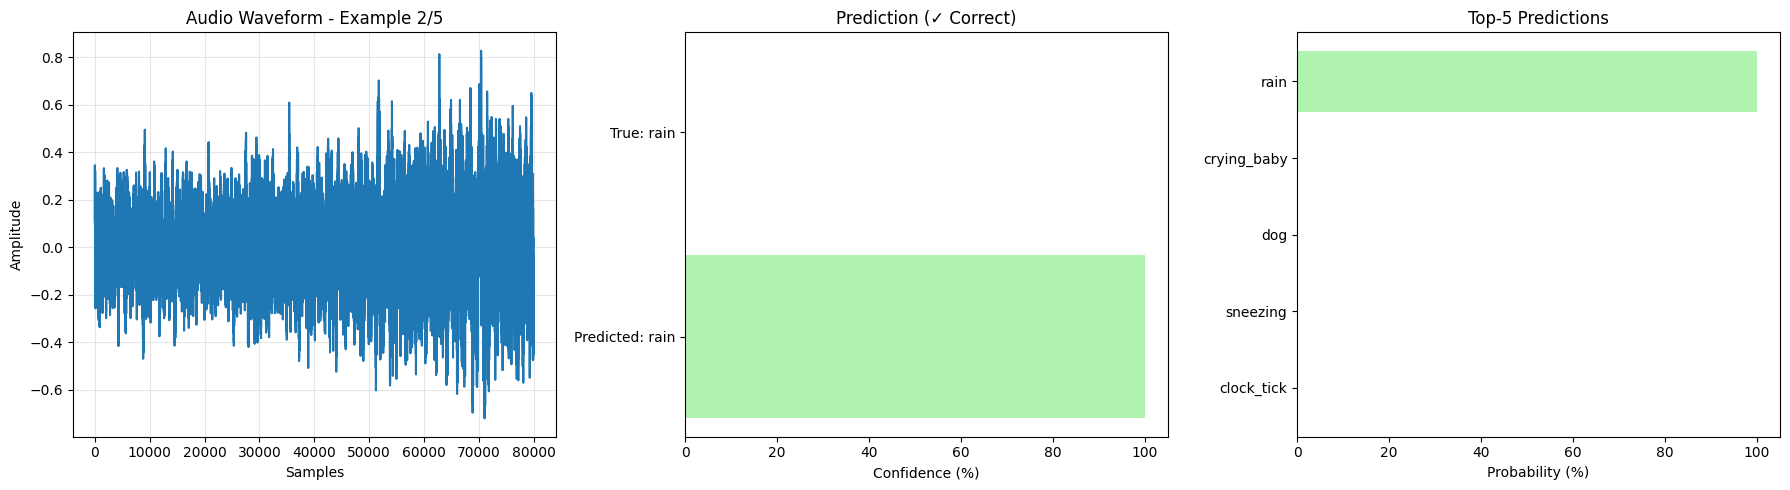

Playing: rain


Prediction: rain (100.00%)
True label: rain
Correct: True


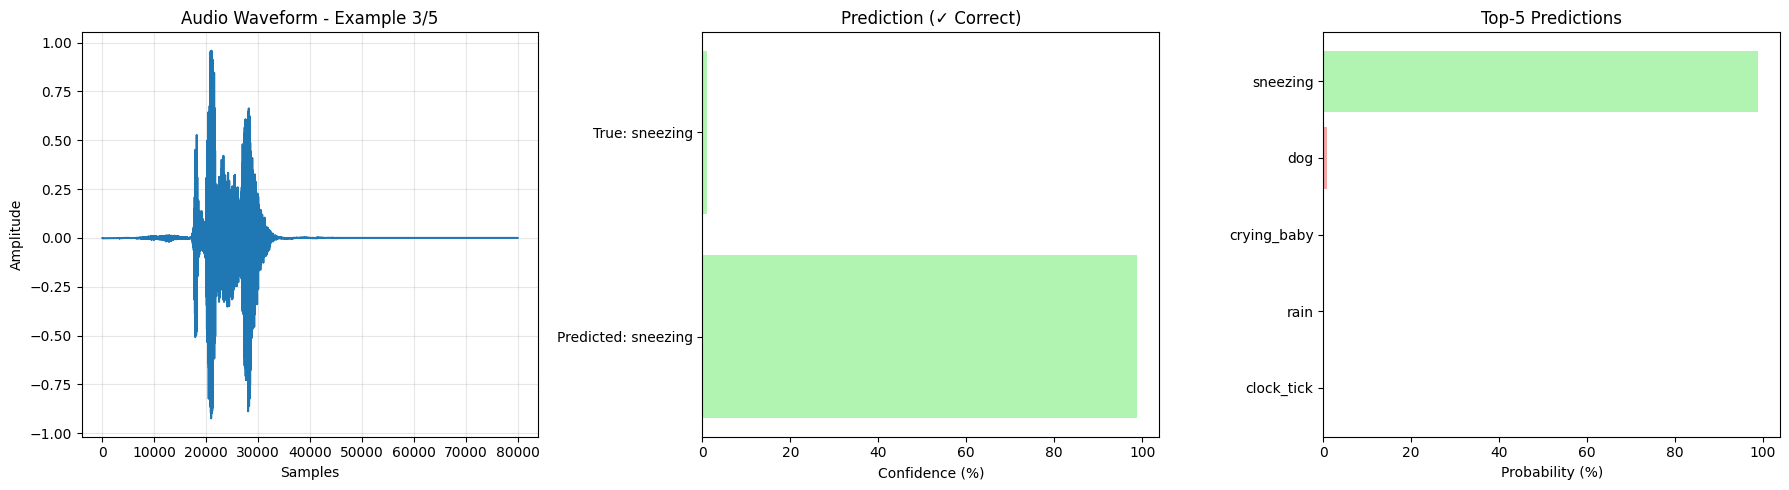

Playing: sneezing


Prediction: sneezing (98.92%)
True label: sneezing
Correct: True


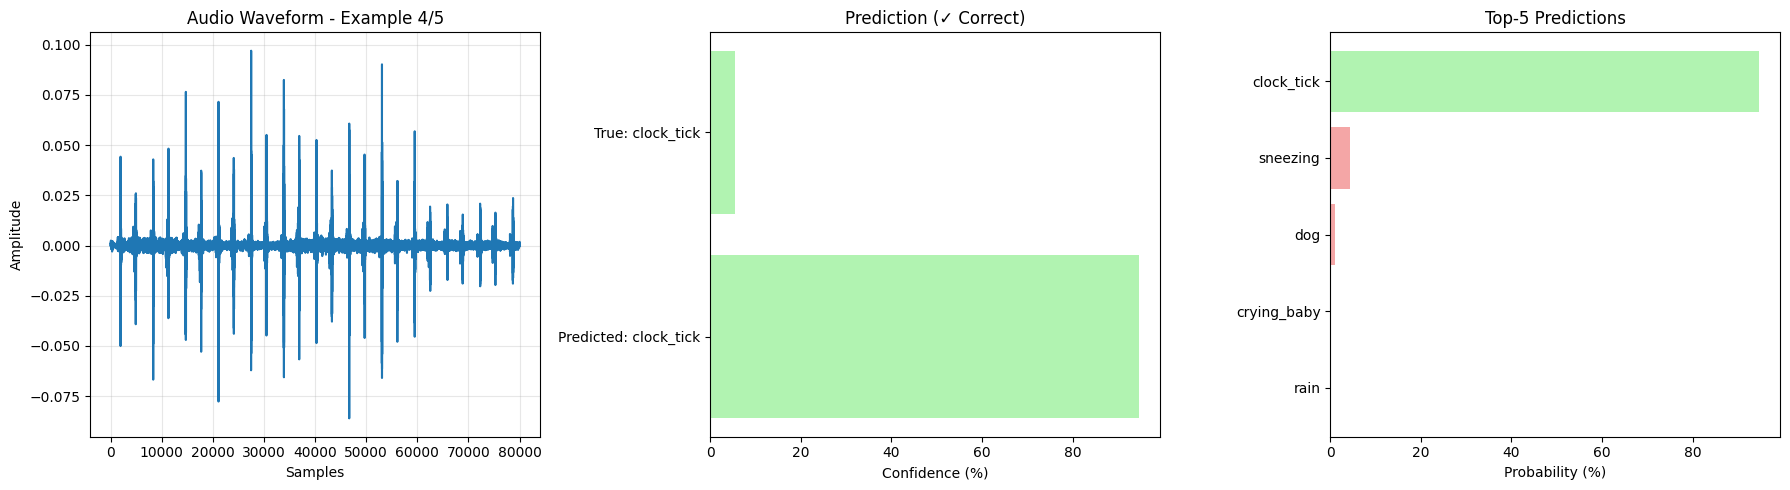

Playing: clock_tick


Prediction: clock_tick (94.59%)
True label: clock_tick
Correct: True


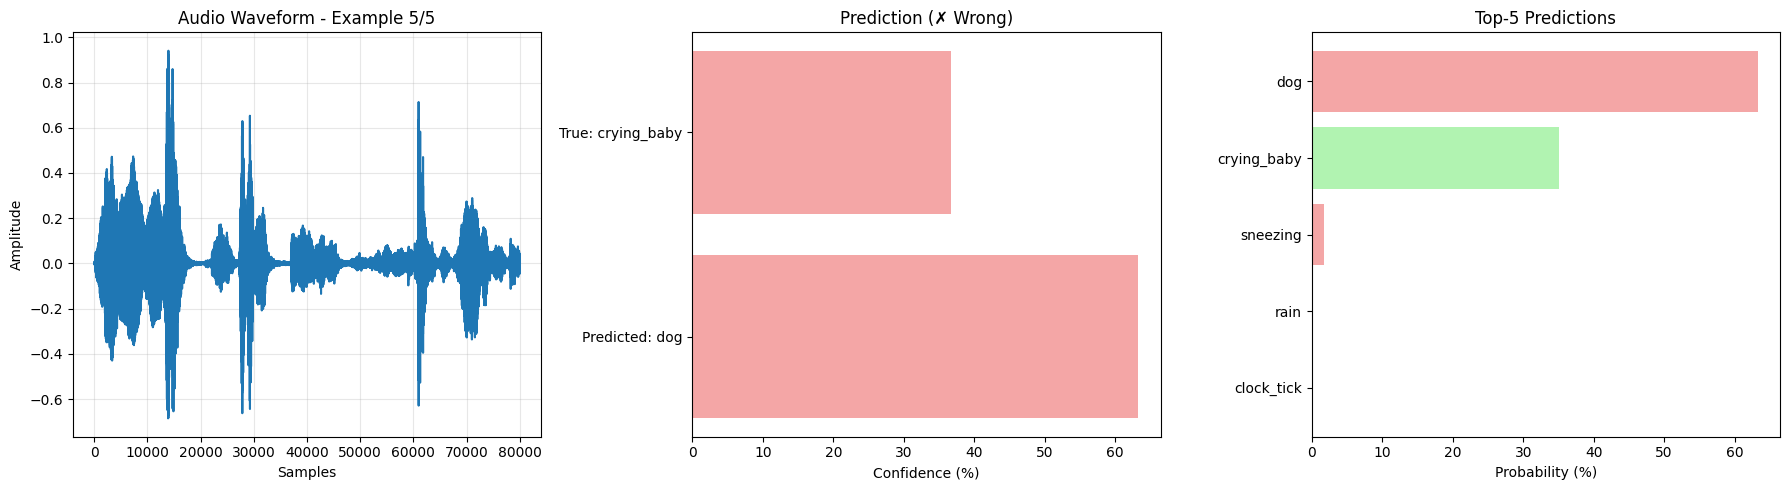

Playing: crying_baby


Prediction: dog (63.27%)
True label: crying_baby
Correct: False
ESC-50 Test Set Evaluation (Fold 5):
Correct: 34/40
Accuracy: 85.00%


In [12]:
class ESC50TestDemo:
    def __init__(self, model, test_dataset, device):
        self.model = model
        self.test_dataset = test_dataset
        self.device = device
        self.classes = categories
        self.model.eval()  # Set to evaluation mode

    def predict_audio(self, signal):
        """Predict class for a single audio signal"""
        with torch.no_grad():
            signal = signal.unsqueeze(0).to(self.device)  # Add batch dimension
            outputs = self.model(signal)
            probabilities = torch.softmax(outputs, dim=1)
            confidence, predicted = torch.max(probabilities, 1)

        return predicted.item(), confidence.item(), probabilities.cpu().numpy()[0]

    def run_interactive_demo(self, num_examples=1):
        """Run interactive demo with random test examples"""
        print("ESC-50 Audio Classification Demo!")
        print("=" * 60)
        
        # Get random test examples
        indices = np.random.choice(len(self.test_dataset), num_examples, replace=False)
        for i, idx in enumerate(indices):
            # Load audio and true label
            signal, true_label = self.test_dataset[idx]
            true_class = self.classes[true_label]

            # Get prediction
            predicted_idx, confidence, all_probs = self.predict_audio(signal)
            predicted_class = self.classes[predicted_idx]

            # Clear previous output
            # clear_output(wait=True)

            # Create plot
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

            # Plot waveform
            ax1.plot(signal.squeeze().numpy())
            ax1.set_title(f'Audio Waveform - Example {i+1}/{num_examples}')
            ax1.set_xlabel('Samples')
            ax1.set_ylabel('Amplitude')
            ax1.grid(True, alpha=0.3)

            # Plot prediction info
            colors = ['lightcoral', 'lightgreen']
            correct = predicted_class == true_class
            ax2.barh([0, 1], [confidence * 100, (1-confidence) * 100],
                     color=colors[correct], alpha=0.7)
            ax2.set_yticks([0, 1])
            ax2.set_yticklabels([f'Predicted: {predicted_class}',
                               f'True: {true_class}'])
            ax2.set_xlabel('Confidence (%)')
            ax2.set_title(f'Prediction ({"✓ Correct" if correct else "✗ Wrong"})')

            # Plot top-5 predictions
            top5_indices = np.argsort(all_probs)[-5:][::-1]
            top5_classes = [self.classes[idx] for idx in top5_indices]
            top5_probs = all_probs[top5_indices]

            colors = ['lightgreen' if cls == true_class else 'lightcoral' for cls in top5_classes]
            ax3.barh(range(5), top5_probs * 100, color=colors, alpha=0.7)
            ax3.set_yticks(range(5))
            ax3.set_yticklabels(top5_classes)
            ax3.set_xlabel('Probability (%)')
            ax3.set_title('Top-5 Predictions')
            ax3.invert_yaxis()  # Highest probability at top

            plt.tight_layout()
            plt.show()

            # Display audio player
            print(f"Playing: {true_class}")
            display(Audio(signal.squeeze().numpy(), rate=16000))

            print(f"Prediction: {predicted_class} ({confidence:.2%})")
            print(f"True label: {true_class}")
            print(f"Correct: {correct}")
            print("=" * 60)


    def evaluate_test_set(self):
        """Evaluate on entire test set"""
        test_loader = DataLoader(self.test_dataset, batch_size=32, shuffle=False)
        self.model.eval()
        correct = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(self.device), target.to(self.device)
                outputs = self.model(data)
                _, predicted = torch.max(outputs.data, 1)

                total += target.size(0)
                correct += (predicted == target).sum().item()

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(target.cpu().numpy())

        accuracy = 100 * correct / total
        print(f"ESC-50 Test Set Evaluation (Fold 5):")
        print(f"Correct: {correct}/{total}")
        print(f"Accuracy: {accuracy:.2f}%")

        return accuracy, all_predictions, all_labels

# Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create demo
demo = ESC50TestDemo(best_model, valid_dataset, device)

# Run interactive demo
demo.run_interactive_demo(num_examples=5)

# Evaluate on entire test set
test_accuracy, predictions, true_labels = demo.evaluate_test_set()

### **Create submission to Stepik**

Вам нужно:
* **1 шаг.** сделать предсказания для `test.csv` при помощи лучшей модели
* **2 шаг.** создать `submission.csv` файл с колонкой `category`, положить туда свои предсказания и сохранить файл.

In [13]:
test_df['category'] = 0
test_data = SimpleAudioDataset(test_df)

In [14]:
y_test_pred = []
for id in range(len(test_data)):
     signal, _ = test_data[id]
     signal = signal.unsqueeze(0)
     pred = best_model(signal)
     _, predicted_classes = torch.max(pred.data, dim=1)
     predicted_classes = predicted_classes
     y_test_pred.append(categories[predicted_classes])
y_test_pred

['crying_baby',
 'rain',
 'sneezing',
 'rain',
 'rain',
 'sneezing',
 'rain',
 'clock_tick',
 'rain',
 'crying_baby',
 'dog',
 'dog',
 'crying_baby',
 'dog',
 'crying_baby',
 'dog',
 'clock_tick',
 'clock_tick',
 'sneezing',
 'rain',
 'dog',
 'dog',
 'rain',
 'dog',
 'clock_tick',
 'clock_tick',
 'clock_tick',
 'clock_tick',
 'clock_tick',
 'dog',
 'dog',
 'dog',
 'clock_tick',
 'sneezing',
 'sneezing',
 'sneezing',
 'dog',
 'dog',
 'clock_tick',
 'sneezing']

In [15]:
submission = pd.read_csv("test.csv")
submission['category'] = y_test_pred
submission.to_csv("submission.csv", index=False)

### **Report**

В работе над домашним заданием по классификации аудиофайлов формата WAV на 5 классов я последовательно подходил к обработке данных и архитектуре модели для достижения оптимального результата.

Все аудиозаписи в датасете имели фиксированную длину 5 секунд, поэтому я выбрал этот параметр как основу для паддинга и усечения входных данных. На начальном этапе я не применял никаких методов аугментации, чтобы оценить базовые возможности модели.

Архитектуру нейронной сети составили два сверточных слоя с нормализацией и пуллингом, разделяющим сигнал на 4 части, а также два полносвязных слоя с активацией ReLU. Анализ метрик показал признаки переобучения, что указывало на излишнюю сложность архитектуры с учётом исходных данных.

Для борьбы с переобучением я начал экспериментировать с обработкой данных. Сначала добавлял гауссовский шум с фиксированной амплитудой, что привело к росту метрик на валидационном наборе, но улучшения оказались недостаточными. Затем пробовал включать энергию сигнала в комбинации с шумом, однако результат не оправдал ожиданий.

В дальнейшем я отказался от использования энергии, взяв из библиотеки audiomentations набор аугментаций: гауссовский шум, временной сдвиг и сдвиг тона. Такой комплекс аугментаций позволил значительно повысить точность модели, достигнув 75% accuracy на тестовой выборке.

Возможными направлениями для дальнейшего улучшения являются комбинирование различных аугментаций с параметрами энергии или интенсивности аудиосигнала, а также исследование более сложных архитектур, таких как трансформеры или другие современные нейросетевые модели.